In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from skimage.morphology import erosion,disk

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized = cv2.equalizeHist(img)
#     equalized=cv2.calcHist([img],[0],None,[256],[0,256])
    _, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(img, 100, 200)
    flipped1 = cv2.flip(img, -1)
    flipped2 = cv2.flip(img, 0)
    flipped3 = cv2.flip(img, 1)
    
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    plt.figure(figsize=(12, 8))
    
    plt.subplot(241)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(242)
    plt.imshow(equalized, cmap='gray')
    plt.title('Equalized')
    plt.axis('off')
    
    plt.subplot(243)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded')
    plt.axis('off')
    
    plt.subplot(244)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')
    
    plt.subplot(245)
    plt.imshow(flipped1, cmap='gray')
    plt.title('Flipped 1')
    plt.axis('off')
    
    plt.subplot(246)
    plt.imshow(flipped2, cmap='gray')
    plt.title('Flipped 2')
    plt.axis('off')
    
    plt.subplot(247)
    plt.imshow(flipped3, cmap='gray')
    plt.title('Flipped 3')
    plt.axis('off')
    
    plt.subplot(248)
    plt.imshow(morphed, cmap='gray')
    plt.title('Morphed')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


process_image('content.jpeg')

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'Canny'
> Overload resolution failed:
>  - Canny() missing required argument 'threshold1' (pos 2)
>  - Canny() missing required argument 'threshold1' (pos 2)
>  - Canny() missing required argument 'dy' (pos 2)
>  - Canny() missing required argument 'dy' (pos 2)


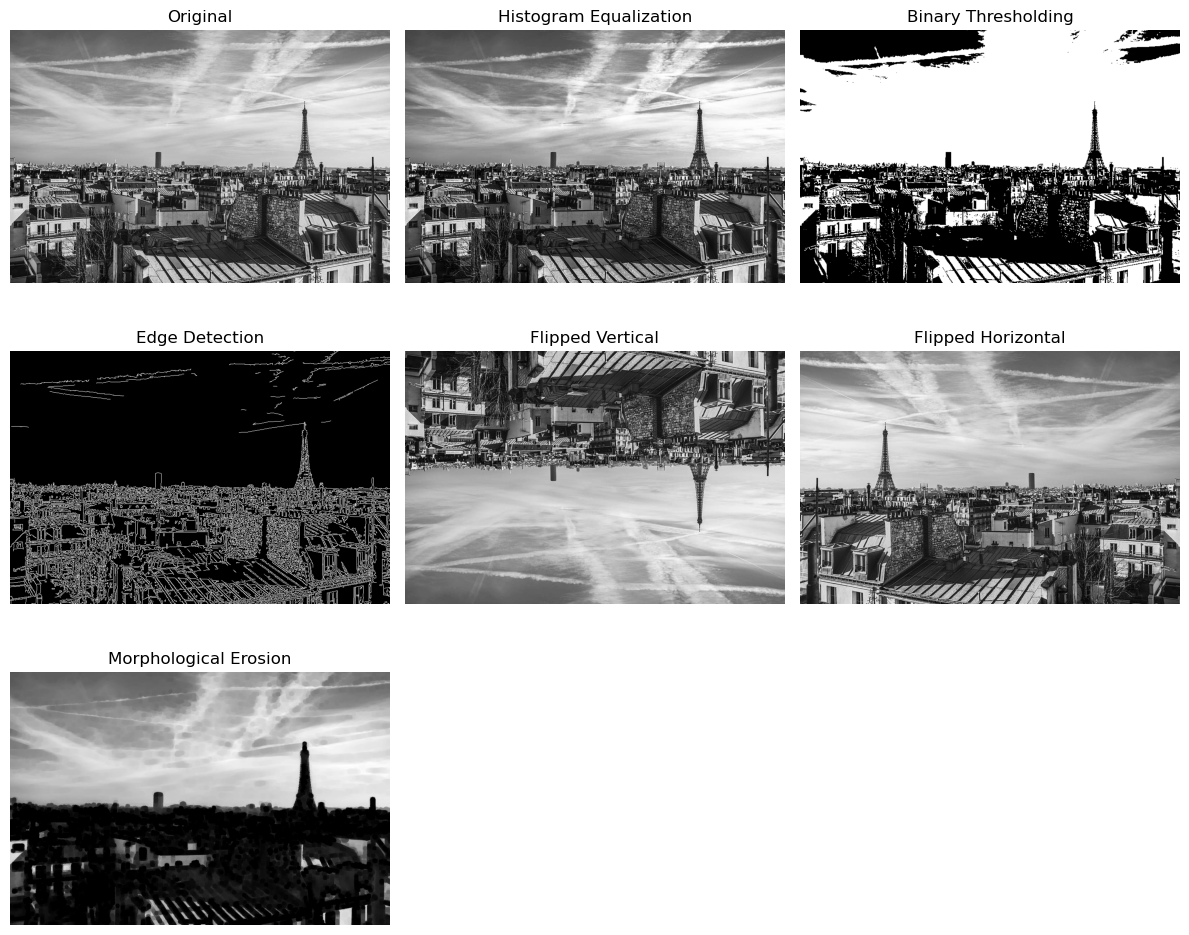

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from skimage.filters import threshold_otsu
from skimage.morphology import erosion, disk

def histogram_equalization(img):
    equalized = cv2.equalizeHist(img)
    return equalized

def binary_thresholding(img):
    _, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    return thresholded

def edge_detection(img):
    edges = cv2.Canny(img, 100, 200)
    return edges

def data_augmentation(img):
    flipped1 = np.flipud(img)  # Flip vertically
    flipped2 = np.fliplr(img)  # Flip horizontally
    return flipped1, flipped2

def morphological_operations(img):
    eroded = erosion(img, disk(5))
    return eroded

def process_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply histogram equalization
    equalized = histogram_equalization(img)
    
    # Apply binary thresholding
    thresholded = binary_thresholding(img)
    
    # Apply edge detection
    edges = edge_detection(img)
    
    # Apply data augmentation (flip)
    flipped1, flipped2 = data_augmentation(img)
    
    # Apply morphological operations (erosion)
    eroded = morphological_operations(img)
    
    # Display images using matplotlib
    plt.figure(figsize=(12, 10))
    
    plt.subplot(331)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(332)
    plt.imshow(equalized, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')
    
    plt.subplot(333)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Binary Thresholding')
    plt.axis('off')
    
    plt.subplot(334)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    
    plt.subplot(335)
    plt.imshow(flipped1, cmap='gray')
    plt.title('Flipped Vertical')
    plt.axis('off')
    
    plt.subplot(336)
    plt.imshow(flipped2, cmap='gray')
    plt.title('Flipped Horizontal')
    plt.axis('off')
    
    plt.subplot(337)
    plt.imshow(eroded, cmap='gray')
    plt.title('Morphological Erosion')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

process_image('content.jpeg')


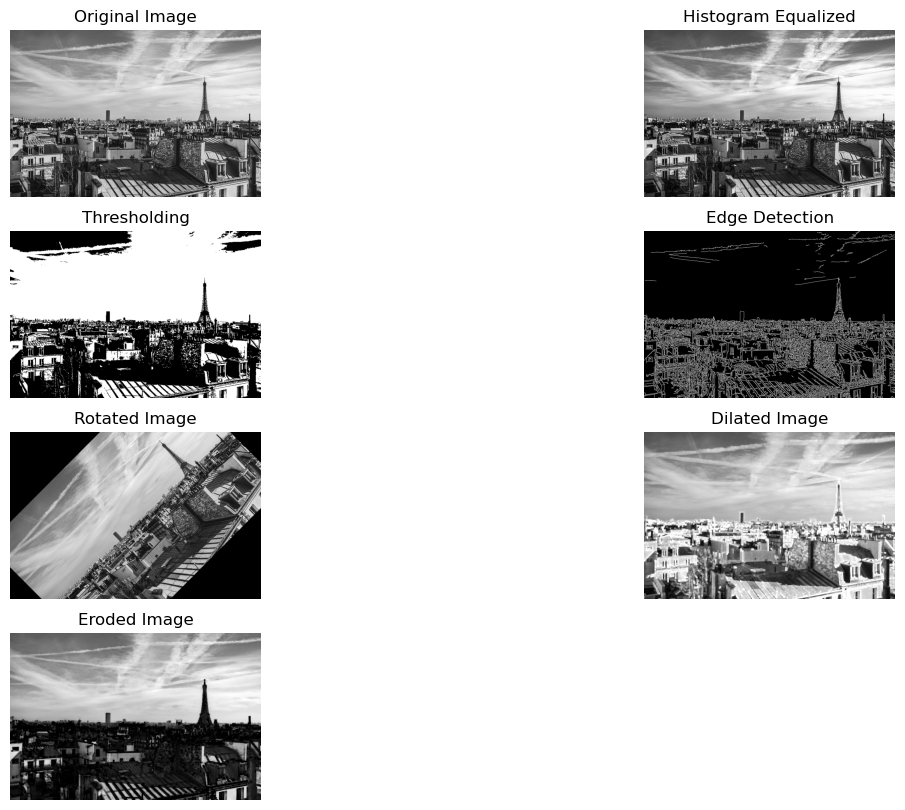

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles, cols=2, cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the image
image_path = 'content.jpeg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Histogram Equalization
    hist_eq_image = cv2.equalizeHist(image)

    # Thresholding
    _, thresh_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Edge Detection using Canny
    edges = cv2.Canny(image, 100, 200)

    # Data Augmentation - Rotation
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))

    # Morphological Operations - Dilation
    kernel = np.ones((5, 5), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    # Morphological Operations - Erosion
    eroded_image = cv2.erode(image, kernel, iterations=1)

    # Set up code for plotting
    titles = ['Original Image', 'Histogram Equalized', 'Thresholding', 'Edge Detection', 'Rotated Image', 'Dilated Image', 'Eroded Image']
    images = [image, hist_eq_image, thresh_image, edges, rotated_image, dilated_image, eroded_image]

    # Display the images
    display_images(images, titles)
